In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import cluster
from sklearn.metrics import DistanceMetric, accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle


In [2]:
df = pd.read_csv("../../USAccidentsDataset.csv")
print(df.shape)

(1045224, 30)


In [3]:
# Muestra los tipos únicos en la columna 'Weather_Condition'
unique = df['Weather_Condition'].unique()
print(len(unique))

110


In [3]:
df.describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,1045224.00,1045224.00,1029340.00,586699.00,1028027.00,1032314.00,1025745.00,944652.00
mean,2.32,0.18,64.84,60.23,65.92,29.68,9.19,7.75
std,0.55,1.48,17.27,21.47,21.94,0.80,2.27,5.40
min,1.00,0.00,-77.80,-50.00,1.00,0.12,0.00,0.00
25%,2.00,0.00,54.00,45.00,50.00,29.53,10.00,4.60
50%,2.00,0.00,67.00,65.00,68.00,29.90,10.00,7.00
75%,3.00,0.01,77.00,76.00,84.00,30.05,10.00,10.40
max,4.00,336.57,196.00,196.00,100.00,58.10,111.00,822.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045224 entries, 0 to 1045223
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Source             1045224 non-null  object 
 1   Severity           1045224 non-null  int64  
 2   Distance(mi)       1045224 non-null  float64
 3   Street             1043512 non-null  object 
 4   City               1045195 non-null  object 
 5   County             1045224 non-null  object 
 6   State              1045224 non-null  object 
 7   Country            1045224 non-null  object 
 8   Timezone           1044746 non-null  object 
 9   Temperature(F)     1029340 non-null  float64
 10  Wind_Chill(F)      586699 non-null   float64
 11  Humidity(%)        1028027 non-null  float64
 12  Pressure(in)       1032314 non-null  float64
 13  Visibility(mi)     1025745 non-null  float64
 14  Wind_Direction     1030827 non-null  object 
 15  Wind_Speed(mph)    944652 non-nu

In [5]:
# We will check if there are any null values in this dataset.
null_values = df.isnull().sum()
null_values

Source                    0
Severity                  0
Distance(mi)              0
Street                 1712
City                     29
County                    0
State                     0
Country                   0
Timezone                478
Temperature(F)        15884
Wind_Chill(F)        458525
Humidity(%)           17197
Pressure(in)          12910
Visibility(mi)        19479
Wind_Direction        14397
Wind_Speed(mph)      100572
Weather_Condition     18793
Amenity                  58
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

In [3]:
df = df.drop(columns=['Wind_Speed(mph)','Wind_Chill(F)' ], axis=1)

In [7]:
null_values = df.isnull().sum()
null_values

Source                   0
Severity                 0
Distance(mi)             0
Street                1712
City                    29
County                   0
State                    0
Country                  0
Timezone               478
Temperature(F)       15884
Humidity(%)          17197
Pressure(in)         12910
Visibility(mi)       19479
Wind_Direction       14397
Weather_Condition    18793
Amenity                 58
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [9]:
null_values = df.isnull().sum()
null_values

Source               0
Severity             0
Distance(mi)         0
Street               0
City                 0
County               0
State                0
Country              0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

In [ ]:
print(df.shape)

(1013063, 28)


In [9]:
df

,Source,Severity,Distance(mi),Street,City,County,State,Country,Timezone,Temperature(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,Source2,3,0.01,I-70 E,Dayton,Montgomery,OH,US,US/Eastern,36.90,...,False,False,False,False,False,False,False,False,False,False
1,Source2,2,0.01,Brice Rd,Reynoldsburg,Franklin,OH,US,US/Eastern,37.90,...,False,False,False,False,False,False,False,False,False,False
2,Source2,2,0.01,State Route 32,Williamsburg,Clermont,OH,US,US/Eastern,36.00,...,False,False,False,False,False,False,False,False,True,False
3,Source2,3,0.01,I-75 S,Dayton,Montgomery,OH,US,US/Eastern,35.10,...,False,False,False,False,False,False,False,False,False,False
4,Source2,2,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,US,US/Eastern,36.00,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045219,Source2,2,0.00,Preston Rd,Plano,Collin,TX,US,US/Central,55.00,...,False,False,False,False,False,False,False,False,True,False
1045220,Source2,2,0.00,S Buckner Blvd,Dallas,Dallas,TX,US,US/Central,59.00,...,False,False,False,False,False,True,False,False,True,False
1045221,Source2,3,0.00,US-75 N,Dallas,Dallas,TX,US,US/Central,61.00,...,False,False,False,False,False,False,False,False,False,False
1045222,Source2,3,0.00,S Goliad St,Rockwall,Rockwall,TX,US,US/Central,58.00,...,False,False,False,False,False,False,False,False,True,False


In [10]:
df['Amenity'] = pd.factorize(df['Amenity'])[0]
df['Bump'] = pd.factorize(df['Bump'])[0]
df['Crossing'] = pd.factorize(df['Crossing'])[0]
df['Give_Way'] = pd.factorize(df['Give_Way'])[0]
df['Junction'] = pd.factorize(df['Junction'])[0]
df['No_Exit'] = pd.factorize(df['No_Exit'])[0]
df['Railway'] = pd.factorize(df['Railway'])[0]
df['Roundabout'] = pd.factorize(df['Roundabout'])[0]
df['Station'] = pd.factorize(df['Station'])[0]
df['Stop'] = pd.factorize(df['Stop'])[0]
df['Traffic_Calming'] = pd.factorize(df['Traffic_Calming'])[0]
df['Traffic_Signal'] = pd.factorize(df['Traffic_Signal'])[0]
df['Turning_Loop'] = pd.factorize(df['Turning_Loop'])[0]
df['Weather_Condition'] = pd.factorize(df['Weather_Condition'])[0]
df['Wind_Direction'] = pd.factorize(df['Wind_Direction'])[0]
df['Timezone'] = pd.factorize(df['Timezone'])[0]
df['State'] = pd.factorize(df['State'])[0]
df['Country'] = pd.factorize(df['Country'])[0]
df['County'] = pd.factorize(df['County'])[0]
df['City'] = pd.factorize(df['City'])[0]
df['Source'] = pd.factorize(df['Source'])[0]
df['Street'] = pd.factorize(df['Street'])[0]

In [11]:
df

,Source,Severity,Distance(mi),Street,City,County,State,Country,Timezone,Temperature(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,0,3,0.01,0,0,0,0,0,0,36.90,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0.01,1,1,1,0,0,0,37.90,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0.01,2,2,2,0,0,0,36.00,...,0,0,0,0,0,0,0,0,1,0
3,0,3,0.01,3,0,0,0,0,0,35.10,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0.01,4,0,0,0,0,0,36.00,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045219,0,2,0.00,23733,4198,618,28,0,3,55.00,...,0,0,0,0,0,0,0,0,1,0
1045220,0,2,0.00,29500,1225,220,28,0,3,59.00,...,0,0,0,0,0,1,0,0,1,0
1045221,0,3,0.00,16310,1225,220,28,0,3,61.00,...,0,0,0,0,0,0,0,0,0,0
1045222,0,3,0.00,68012,3810,500,28,0,3,58.00,...,0,0,0,0,0,0,0,0,1,0


<Axes: >

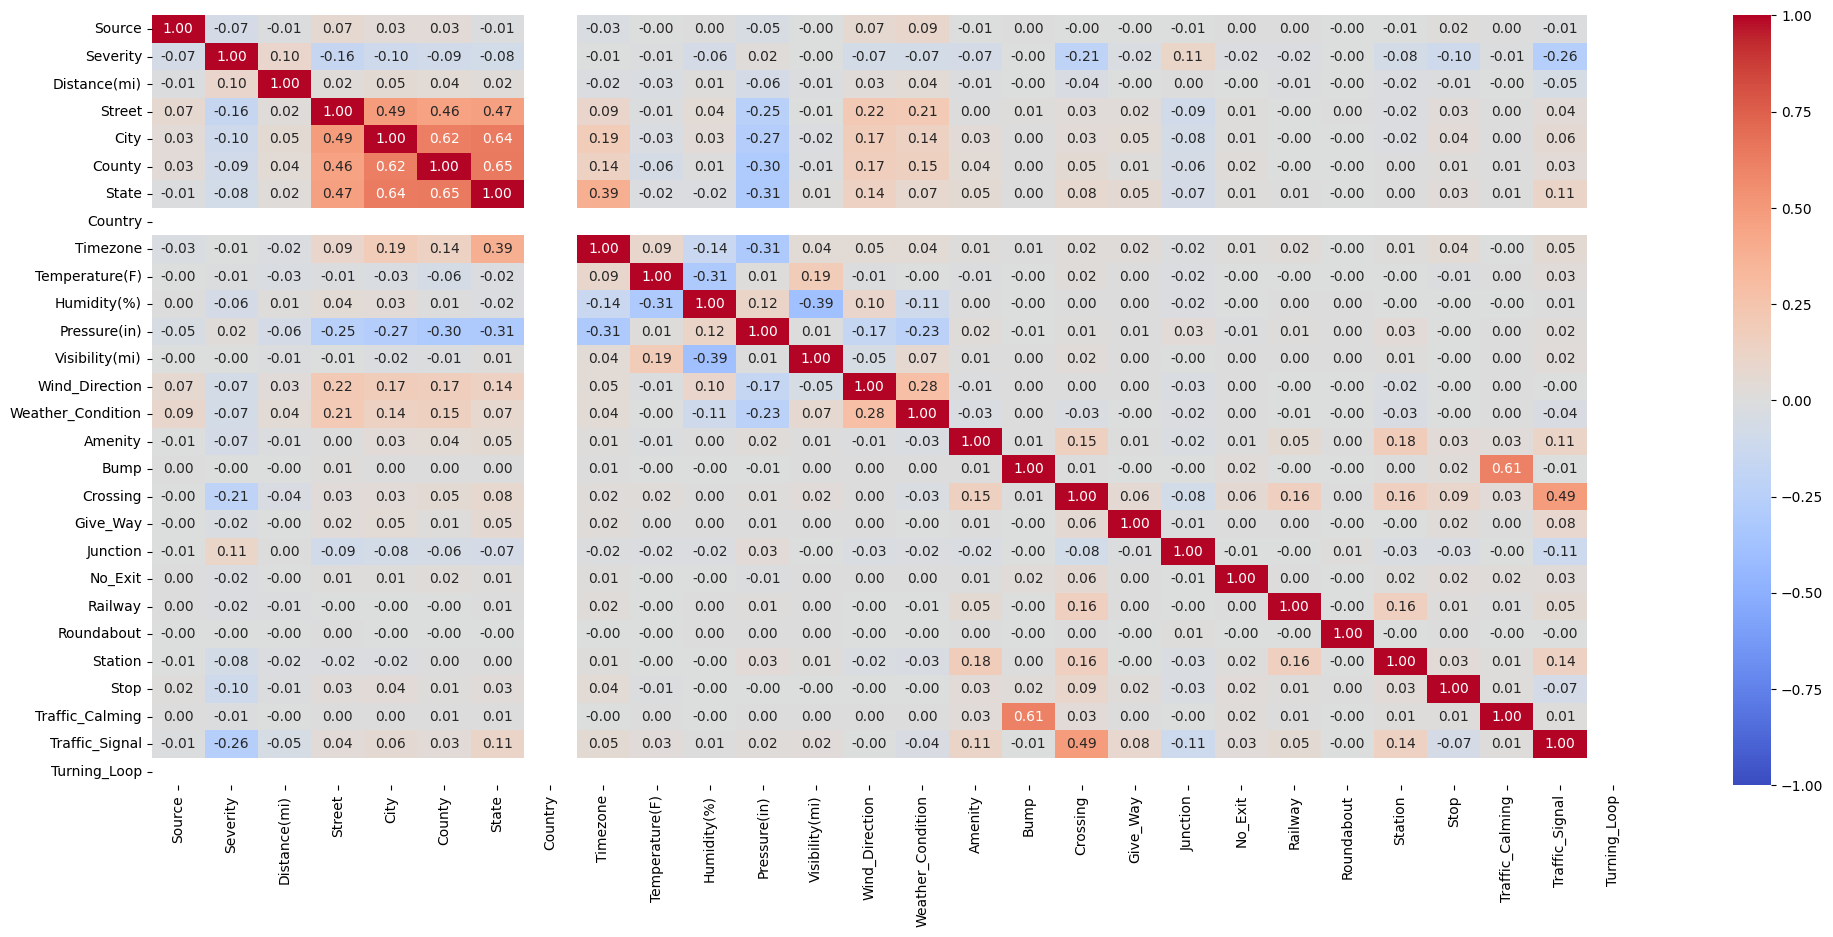

In [ ]:
cor = df.corr()
plt.figure(figsize=(24 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 ,fmt=".2f", cmap = "coolwarm" , annot= True)

In [6]:
df = df.drop(columns=['Country'], axis=1)

Distancia Media	 2349190.79


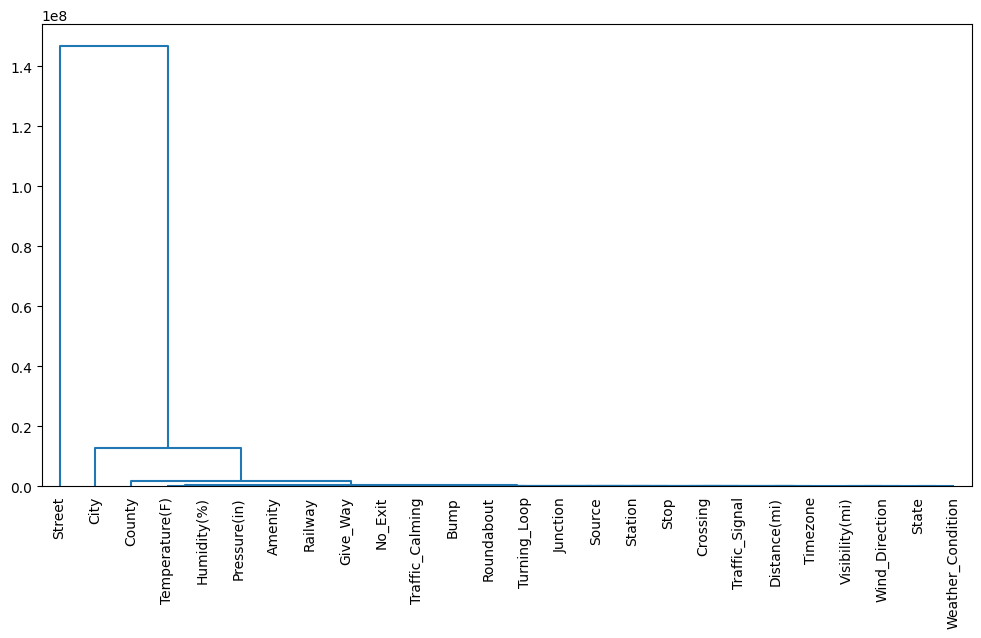

In [ ]:
dist = DistanceMetric.get_metric('euclidean')
X_dist = df.drop(["Severity"], axis=1)
D = dist.pairwise(X_dist.T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

plt.figure(figsize=(12,6))
threshold_2 = 7
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X_dist.columns.to_list(), leaf_rotation=90)
plt.show()

Distancia Media	 15974.94


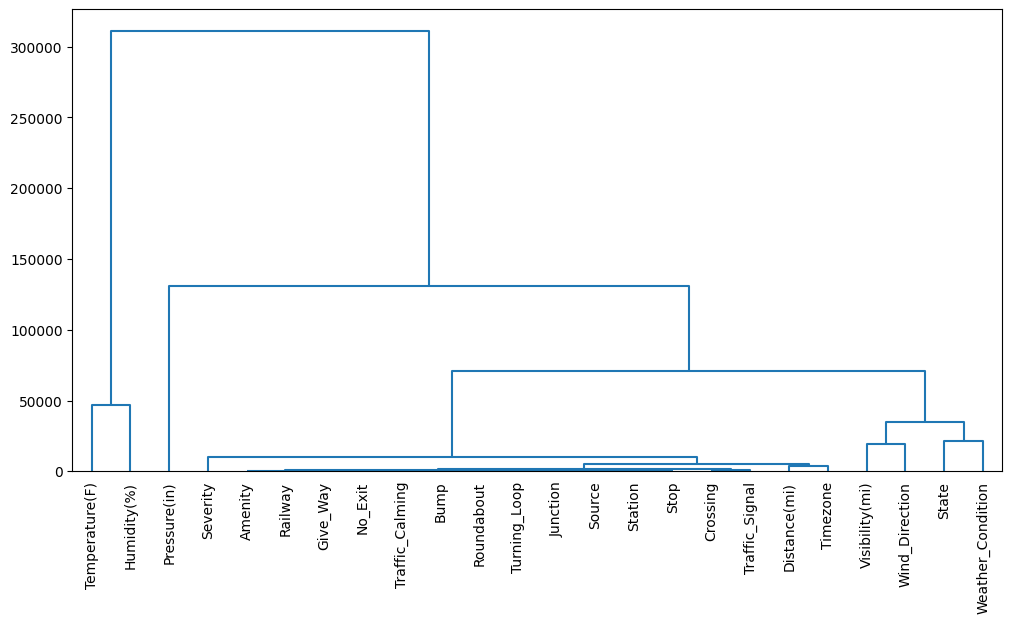

In [ ]:
dist = DistanceMetric.get_metric('euclidean')
X_dist = df.drop([ "Street","City","County"], axis=1)
D = dist.pairwise(X_dist.T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

plt.figure(figsize=(12,6))
threshold_2 = 7
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X_dist.columns.to_list(), leaf_rotation=90)
plt.show()

<Axes: >

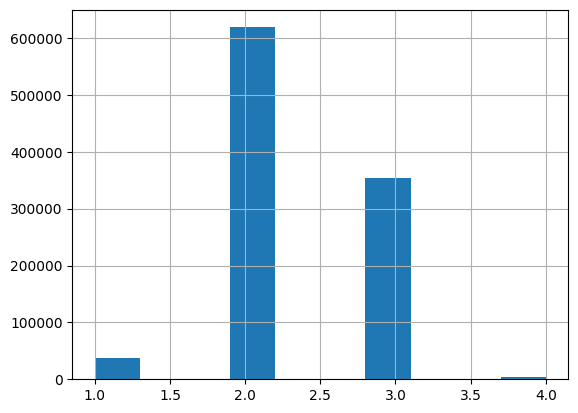

In [8]:
df['Severity'].hist()

In [7]:
# Resetea los índices para que sean secuenciales
df.reset_index(drop=True, inplace=True)

In [8]:
print(df['Severity'].value_counts()[1])
print(df['Severity'].value_counts()[2])
print(df['Severity'].value_counts()[3])
print(df['Severity'].value_counts()[4])

37015
618943
353567
3538


In [8]:
y= df['Severity']

In [ ]:
for i in range(1, 15, 1):
  selector = SelectKBest(score_func=f_classif, k=i)
  X_new = selector.fit_transform(df, y)

  selected_columns = df.columns[selector.get_support()]

  print("Características seleccionadas de la iteración:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas de la iteración:1
Index(['Severity'], dtype='object')

Características seleccionadas de la iteración:2
Index(['Severity', 'Traffic_Signal'], dtype='object')

Características seleccionadas de la iteración:3
Index(['Severity', 'Crossing', 'Traffic_Signal'], dtype='object')

Características seleccionadas de la iteración:4
Index(['Severity', 'Distance(mi)', 'Crossing', 'Traffic_Signal'], dtype='object')

Características seleccionadas de la iteración:5
Index(['Severity', 'Distance(mi)', 'Street', 'Crossing', 'Traffic_Signal'], dtype='object')

Características seleccionadas de la iteración:6
Index(['Severity', 'Distance(mi)', 'Street', 'Weather_Condition', 'Crossing',
       'Traffic_Signal'],
      dtype='object')

Características seleccionadas de la iteración:7
Index(['Severity', 'Distance(mi)', 'Street', 'City', 'Weather_Condition',
       'Crossing', 'Traffic_Signal'],
      dtype='object')

Características seleccionadas de la iteración:8
Index(['Severity', 

In [9]:
selected_columns = ['Distance(mi)', 'Street', 'City', 'County', 'State',
       'Temperature(F)', 'Pressure(in)', 'Wind_Direction', 'Weather_Condition',
       'Crossing', 'Junction', 'Stop', 'Traffic_Signal']

In [10]:
X = df[selected_columns]

In [11]:
# Dividir los datos en conjuntos de entrenamiento y temporal (70% - 30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir el conjunto temporal en validación y prueba (50% - 50% del 30% original, es decir, 15% cada uno)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Imprimir las formas de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape, y_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento: (709144, 13) (709144,)
Tamaño del conjunto de validación: (151959, 13) (151959,)
Tamaño del conjunto de prueba: (151960, 13) (151960,)


In [ ]:
X_train_subset = X_train.iloc[:100000]
X_val_subset = X_val.iloc[:50000]

y_train_subset = y_train.iloc[:100000]
y_val_subset = y_val.iloc[:50000]

clf = LazyClassifier(verbose=0, custom_metric=None)
models, predictions = clf.fit(X_train_subset, X_val_subset, y_train_subset, y_val_subset)

print(models)

In [13]:
def classification_report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("Mean validation accuracy: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("")

In [ ]:
AdaBoost = AdaBoostClassifier()

In [ ]:
# Parámetros de AdaBoostClassifier
param_adaBoost = {
    'n_estimators': [50, 100, 200],  # Número de estimadores (número de modelos base)
    'learning_rate': [0.5, 1.0],  # Tasa de aprendizaje
}

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_adaBoost:
    num_combinations *= len(param_adaBoost[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 6


In [ ]:
grid_classif = GridSearchCV(estimator = AdaBoost, scoring='accuracy', param_grid= param_adaBoost, cv = 5)
best_grid = grid_classif.fit(X_train[selected_columns], y_train)
pred_val_grid = best_grid.predict(X_val[selected_columns])
accuracy_val_grid = accuracy_score(y_val, pred_val_grid)

In [ ]:
grid_classif.cv_results_

{'mean_fit_time': array([ 56.41414142, 122.40015965, 243.7745163 ,  61.29183888,
        199.6982646 , 319.65786309]),
 'std_fit_time': array([ 0.77993942,  0.89514138,  0.68879832,  0.3200343 , 55.90933813,
        64.70805705]),
 'mean_score_time': array([ 1.85689282,  3.87660928,  7.58948121,  1.9213654 ,  7.23949685,
        11.50708165]),
 'std_score_time': array([0.01223262, 0.09486034, 0.08266442, 0.01802552, 3.55634901,
        3.54767954]),
 'param_learning_rate': masked_array(data=[0.5, 0.5, 0.5, 1.0, 1.0, 1.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.5, 'n_estimators': 50},
  {'learning_rate': 0.5, 'n_estimators': 100},
  {'learning_rate': 0.5, 'n_estimators': 200},
  {'learning_rate': 1

In [ ]:
classification_report(grid_classif.cv_results_, n_top = 5)

Model with rank: 1
Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Mean validation accuracy: 0.715 (std: 0.001)

Model with rank: 2
Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Mean validation accuracy: 0.697 (std: 0.003)

Model with rank: 3
Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Mean validation accuracy: 0.695 (std: 0.007)

Model with rank: 4
Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Mean validation accuracy: 0.674 (std: 0.008)

Model with rank: 5
Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Mean validation accuracy: 0.671 (std: 0.002)



In [ ]:
# Parámetros de AdaBoostClassifier
param_adaBoost = {
    'n_estimators': [50, 100, 200],  # Número de estimadores (número de modelos base)
    'algorithm': ['SAMME', 'SAMME.R'],  # Algoritmo a utilizar
}

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_adaBoost:
    num_combinations *= len(param_adaBoost[param])
print(f'El número total de combinaciones de parámetros en RandomSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en RandomSearchCV es 6


In [ ]:
random_classif = RandomizedSearchCV(AdaBoost, param_distributions=param_adaBoost, n_iter=10, cv=5, scoring='accuracy', random_state=42)
best_random = random_classif.fit(X_train[selected_columns], y_train)
pred_val_random = best_random.predict(X_val[selected_columns])
accuracy_val_random = accuracy_score(y_val, pred_val_random)
print("Precisión en el conjunto de validación con RandomSearch:", accuracy_val_random)

Precisión en el conjunto de validación con RandomSearch: 0.7118101997403918


In [ ]:
classification_report(random_classif.cv_results_, n_top = 5)

Model with rank: 1
Parameters: {'n_estimators': 200, 'algorithm': 'SAMME.R'}
Mean validation accuracy: 0.715 (std: 0.001)

Model with rank: 2
Parameters: {'n_estimators': 100, 'algorithm': 'SAMME.R'}
Mean validation accuracy: 0.695 (std: 0.007)

Model with rank: 3
Parameters: {'n_estimators': 50, 'algorithm': 'SAMME.R'}
Mean validation accuracy: 0.674 (std: 0.008)

Model with rank: 4
Parameters: {'n_estimators': 200, 'algorithm': 'SAMME'}
Mean validation accuracy: 0.644 (std: 0.003)

Model with rank: 5
Parameters: {'n_estimators': 100, 'algorithm': 'SAMME'}
Mean validation accuracy: 0.625 (std: 0.006)



In [14]:
DecisionTree = DecisionTreeClassifier()

In [15]:
param_decision_tree = {
    'criterion': ['gini'],  # Función para medir la calidad de la división
    'splitter': ['best'],  # Estrategia utilizada para elegir la división en cada nodo
    'max_depth': [10, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': ['sqrt', 'log2'],  # Número máximo de características a considerar para la mejor división
}

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_decision_tree:
    num_combinations *= len(param_decision_tree[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 36


In [ ]:
grid_classif = GridSearchCV(estimator = DecisionTree, scoring='accuracy', param_grid= param_decision_tree, cv = 5)
best_grid = grid_classif.fit(X_train[selected_columns], y_train)
pred_val_grid = best_grid.predict(X_val[selected_columns])
accuracy_val_grid = accuracy_score(y_val, pred_val_grid)
print("Precisión en el conjunto de validación con GridSearchCV:", accuracy_val_grid)

Precisión en el conjunto de validación con GridSearchCV: 0.7537522271522558


In [ ]:
classification_report(grid_classif.cv_results_, n_top = 5)

Model with rank: 1
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Mean validation accuracy: 0.755 (std: 0.006)

Model with rank: 2
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Mean validation accuracy: 0.755 (std: 0.008)

Model with rank: 3
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Mean validation accuracy: 0.755 (std: 0.011)

Model with rank: 4
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Mean validation accuracy: 0.754 (std: 0.009)

Model with rank: 5
Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Mean valid

In [16]:
param_decision_tree = {
    'criterion': ['gini'],  # Función para medir la calidad de la división
    'splitter': ['best'],  # Estrategia utilizada para elegir la división en cada nodo
    'max_depth': [10, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': ['sqrt', 'log2'],  # Número máximo de características a considerar para la mejor división
}

In [17]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_decision_tree:
    num_combinations *= len(param_decision_tree[param])
print(f'El número total de combinaciones de parámetros en RandomSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en RandomSearchCV es 36


In [18]:
random_classif = RandomizedSearchCV(estimator = DecisionTree, param_distributions=param_decision_tree, n_iter=10, cv=5, scoring='accuracy', random_state=42)
best_random = random_classif.fit(X_train[selected_columns], y_train)
pred_val_random = best_random.predict(X_val[selected_columns])
accuracy_val_random = accuracy_score(y_val, pred_val_random)
print("Precisión en el conjunto de validación con RandomSearch:", accuracy_val_random)

Precisión en el conjunto de validación con RandomSearch: 0.7544403424607954


In [ ]:
classification_report(random_classif.cv_results_, n_top = 5)

Model with rank: 1
Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
Mean validation accuracy: 0.751 (std: 0.011)

Model with rank: 2
Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Mean validation accuracy: 0.750 (std: 0.005)

Model with rank: 3
Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
Mean validation accuracy: 0.749 (std: 0.005)

Model with rank: 4
Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Mean validation accuracy: 0.747 (std: 0.007)

Model with rank: 5
Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Mean vali

ESTA PARTE ES SOLAMENTE DE TEST

In [24]:
BaggingClassifier = BaggingClassifier()

In [30]:
param_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
}

In [31]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_bagging:
    num_combinations *= len(param_bagging[param])
print(f'El número total de combinaciones de parámetros en RandomSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en RandomSearchCV es 9


In [ ]:
random_classif = RandomizedSearchCV(estimator = BaggingClassifier, param_distributions=param_bagging, n_iter=10, cv=5, scoring='accuracy', random_state=42)
best_random = random_classif.fit(X_train[selected_columns], y_train)
pred_val_random = best_random.predict(X_val[selected_columns])
accuracy_val_random = accuracy_score(y_val, pred_val_random)
print("Precisión en el conjunto de validación con RandomSearch:", accuracy_val_random)

FIN DE LA PARTE DE TEST

In [19]:
# Evaluar el mejor modelo en el conjunto de validación
best_model = random_classif.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en el conjunto de validación con el mejor modelo: {val_accuracy}")

Accuracy en el conjunto de validación con el mejor modelo: 0.7544403424607954


In [20]:
# Evaluar el modelo final en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")

Accuracy en el conjunto de prueba: 0.75506054224796


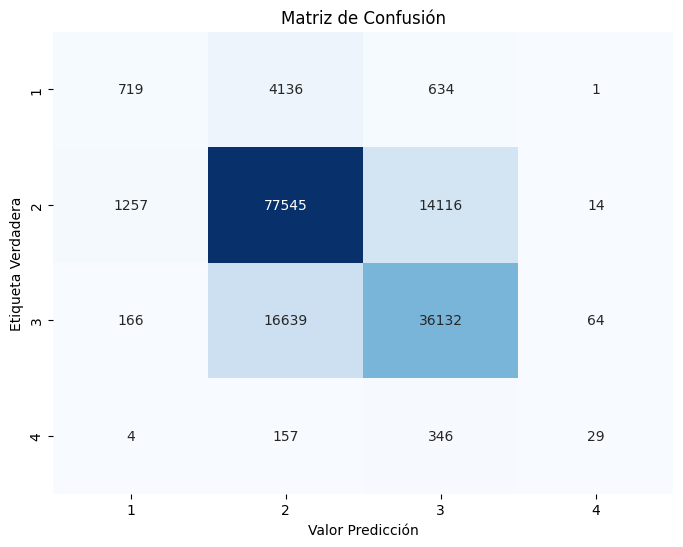

In [12]:
# Ajusta y predice con el modelo DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(splitter='best', min_samples_split=2, min_samples_leaf=4,
                                      max_features='log2', max_depth=20, criterion='gini')
model = DecisionTree.fit(X_train[selected_columns], y_train)

pred_val = DecisionTree.predict(X_val[selected_columns])
accuracy = accuracy_score(y_val, pred_val)

matriz = confusion_matrix(y_val, pred_val)

# Define las etiquetas personalizadas para los ejes
labels = [1, 2, 3, 4]

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel('Valor Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

plt.show()

In [17]:
df[selected_columns]

,Distance(mi),Street,City,County,State,Temperature(F),Pressure(in),Wind_Direction,Weather_Condition,Crossing,Junction,Stop,Traffic_Signal
0,0.01,0,0,0,0,36.90,29.68,0,0,0,0,0,0
1,0.01,1,1,1,0,37.90,29.65,0,0,0,0,0,0
2,0.01,2,2,2,0,36.00,29.67,1,1,0,0,0,1
3,0.01,3,0,0,0,35.10,29.64,1,2,0,0,0,0
4,0.01,4,0,0,0,36.00,29.65,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013058,0.00,23153,4085,599,25,55.00,29.49,17,26,0,0,0,1
1013059,0.00,28649,1196,212,25,59.00,29.72,16,26,1,0,0,1
1013060,0.00,15898,1196,212,25,61.00,29.51,17,26,0,0,0,0
1013061,0.00,66477,3715,490,25,58.00,29.58,16,26,0,0,0,1


In [13]:
# Saves the model
accidents_filename = "accidents_model.pkl"
with open(accidents_filename, 'wb') as file:
    pickle.dump(model, file)

In [6]:
# Supongamos que ya tienes los arrays creados
array_state = pd.factorize(df['State'])[1]
array_county = pd.factorize(df['County'])[1]
array_city = pd.factorize(df['City'])[1]
array_street = pd.factorize(df['Street'])[1]

# Creamos diccionarios vacíos para almacenar los mapeos
map_state = {}
map_county = {}
map_city = {}
map_street = {}

# Iteramos sobre los arrays y asignamos un número único a cada valor
for i, state in enumerate(array_state):
    map_state[state] = i

for i, county in enumerate(array_county):
    map_county[county] = i

for i, city in enumerate(array_city):
    map_city[city] = i

for i, street in enumerate(array_street):
    map_street[street] = i

# Ahora puedes usar los diccionarios de mapeo para obtener el número asociado a cada valor
print(map_state['AL'])  # Esto debería imprimir 0

28
